## Boosting the revenue for a big online store <a class="tocSkip">

## Introduction <a class="tocSkip">
   The goal for this project is boosting the revenue for the online store. In order to do that, the analytic department together  with the marketing department compiled a list of hypotheses.<br> 
   In this project we will prioritize these hypotheses, launch an A/B test, and analyze the results


# PART 1

## Data preprocessing<a class="tocSkip">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


try:
    data1 = pd.read_csv('C:/Users/Anait Akopyan/Desktop/Yclass/Module2/hypotheses_us.csv')
except:
    data1 = pd.read_csv('/datasets/hypotheses_us.csv') 


In [3]:

print(data1)

           Hypothesis;Reach;Impact;Confidence;Effort
0  Add two new channels for attracting traffic. T...
1  Launch your own delivery service. This will sh...
2  Add product recommendation blocks to the store...
3  Change the category structure. This will incre...
4  Change the background color on the main page. ...
5  Add a customer review page. This will increase...
6  Show banners with current offers and sales on ...
7  Add a subscription form to all the main pages....
8  Launch a promotion that gives users discounts ...


lets split the data into columns by ';'

In [4]:
data = data1['Hypothesis;Reach;Impact;Confidence;Effort'].apply(lambda x: pd.Series(x.split(';')))
data.head(3)

,0,1,2,3,4
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3


now split and name the columns

In [5]:
'Hypothesis;Reach;Impact;Confidence;Effort'.split(';')

['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']

In [6]:
data.columns = 'Hypothesis;Reach;Impact;Confidence;Effort'.split(';')

In [7]:
pd.set_option('max_colwidth', -1)
data

<ipython-input-7-03270e070bfd>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [8]:
cols = ['Reach','Impact','Confidence','Effort']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

### Conclusion <a class="tocSkip"> 
- we split the data into columns. Now the dataFrame is ready to work with

## Part 1. Prioritizing Hypotheses <a class="tocSkip"> 

### Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.


In [9]:
data['ICE'] = (data['Impact'] * data['Confidence']) / data['Effort']
data = data.sort_values('ICE',  ascending=False )
data

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


 - According to ICE framework hypothesis N8 is the most promising hypothesis - 'Show banners with current offers and sales on the main page. This will boost conversion'
 - N5, N3 and N4 are at the end of the list 

### Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority

In [10]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data['Effort']
data = data.sort_values('RICE',  ascending=False )
data.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


According to RICE framework N7 is the most promising hypothesis. N4 is the most unreliable hypothesis

### Show how the prioritization of hypotheses changes when you use RICE instead of ICE . Provide an explanation for the changes.


The only difference between ICE and RICE framework is Reach Parameter. ICE has 3 components, RICE has four components (same as ICE + Reach), thats why we have different results. Based on both dataframes we can conclude that the most promising hypothesis (3d place for ICe and 1st place for RICE). the most unreliable hypothesis are N5 and N4

# Part 2

## A/B Test Analysis<a class="tocSkip">

### Data preprocessing<a class="tocSkip">

In [11]:
try:
    orders = pd.read_csv('C:/Users/Anait Akopyan/Desktop/Yclass/Module2/orders_us.csv')
    visits = pd.read_csv('C:/Users/Anait Akopyan/Desktop/Yclass/Module2/visits_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')


In [12]:
visits.head(3)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


in order to optimise memory usage lets convert orders['date'] and visits['date'] columns to datetime

In [16]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y.%m.%d')
visits['date'] = pd.to_datetime(visits['date'], format='%Y.%m.%d')

Checking missing values and duplicates:

In [17]:
print(visits.duplicated().any())
print(orders.duplicated().any())

False
False


no duplicates in df

In [18]:
print(visits.isna().sum())
print(orders.isna().sum())

date      0
group     0
visits    0
dtype: int64
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


no missing values in df

Now lets check if there are any users  which belong to both A and B groups.
In order to do that for orders df we'll check if all transactionId are unique ones:

In [19]:
orders['transactionId'].duplicated().any()

False

no users belonging to both A and B groups

### 1.Graph cumulative revenue by group. Make conclusions and conjectures<a class="tocSkip">

building an array with unique paired date-group values on orders

In [20]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


getting aggregated cumulative daily data on orders 

In [21]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


getting aggregated cumulative daily data on visitors  

In [22]:
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


merging the two tables into one and giving its columns descriptive names

In [23]:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      2356.8   719     
1 2019-08-01  B     21      20      1620.0   713     
2 2019-08-02  A     44      38      3860.3   1338    
3 2019-08-02  B     45      43      4243.8   1294    
4 2019-08-03  A     68      62      5675.5   1845    


DataFrame with cumulative orders and cumulative revenue by day, group A and B

In [24]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Plotting the group A and B revenue graphs 

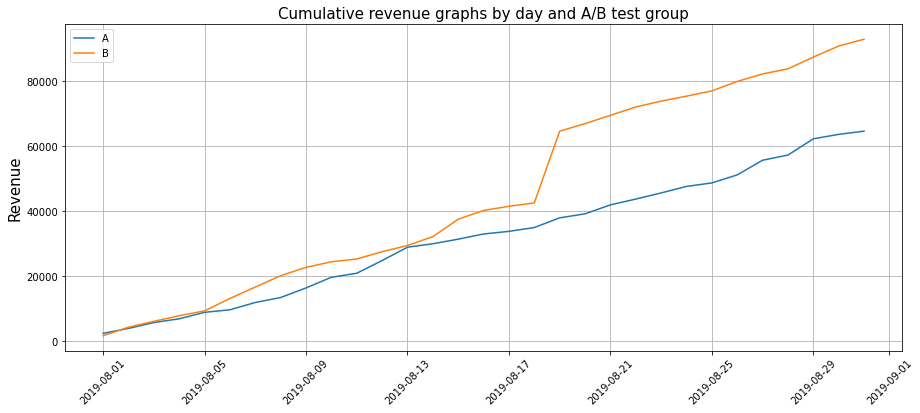

In [25]:
plt.figure(figsize=(15, 6))
plt.title('Cumulative revenue graphs by day and A/B test group', fontsize=15,)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel('Revenue', fontsize=15)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend();

### Conclusion<a class="tocSkip">

Revenue is rising steadily throughout the whole test which is a good sign.
Also we can see that group B has spike in revenue 2019-08-19. This may imply either a surge in the number of orders or the presence of very expensive orders in the group B starting from that day

### 2 Graph cumulative average order size by group. Make conclusions and conjectures.<a class="tocSkip">

Let's plot average purchase size by group.

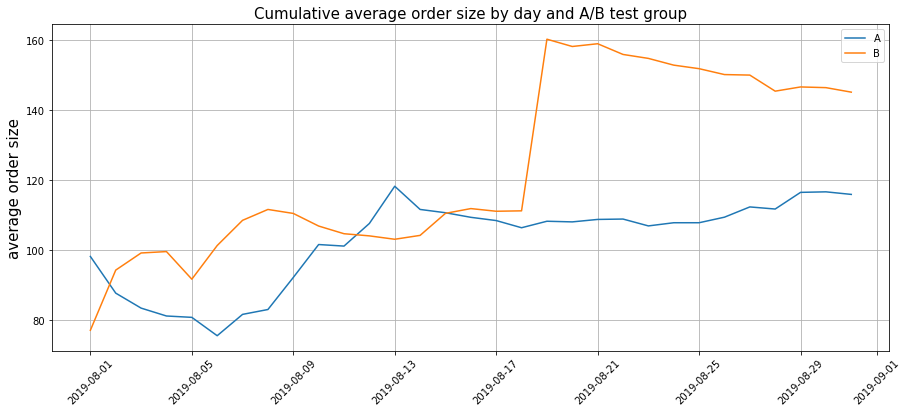

In [26]:
plt.figure(figsize=(15, 6))
plt.title('Cumulative average order size by day and A/B test group', fontsize=15,)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel('average order size', fontsize=15)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() ;

### Conclusion<a class="tocSkip">
We can see that during the whole period the average order size are changing (sometimes growing but sometimes falling down) for both groups. It stabilizes for group A starting from 2019-08-13. and keeps on falling for group B. 
The surge in group B on 19th of August tells us that most probably we were right in the previous section saying that we had a surge in the number of orders for group B that day.

### 3.Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.<a class="tocSkip">


merging the groups into one DataFrame

In [27]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plotting a relative difference graph for the average order sizes

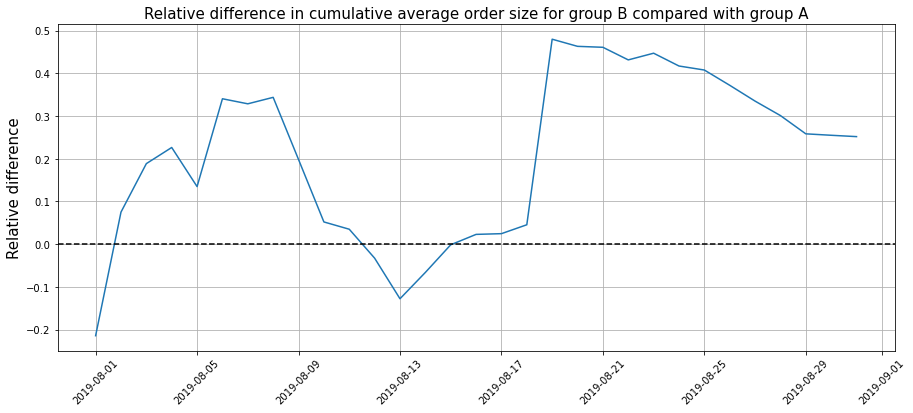

In [28]:
plt.figure(figsize=(15, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.ylabel('Relative difference', fontsize=15)
plt.xticks(rotation=45)
plt.title('Relative difference in cumulative average order size for group B compared with group A', fontsize=15,)
plt.grid();
plt.axhline(y=0, color='black', linestyle='--');

At several points the difference between the segments spikes. This means there might be some big orders and outliers. We can see a massive spike on 19th of August. As we've already seen on Cumulative average order size graph, there is a big spike in order size of group B that day. Also we see that the graph is below the axline between 11th August and 15th of August and 1-2d of August. This is the only time when group A had bigger order size than group B according to Cumulative average order size graph. Starting from 19th of August the graph is going down slowly.

### 4.Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.<a class="tocSkip">

calculating cumulative conversion

In [29]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

selecting data on group A and group B

In [30]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plotting the graphs

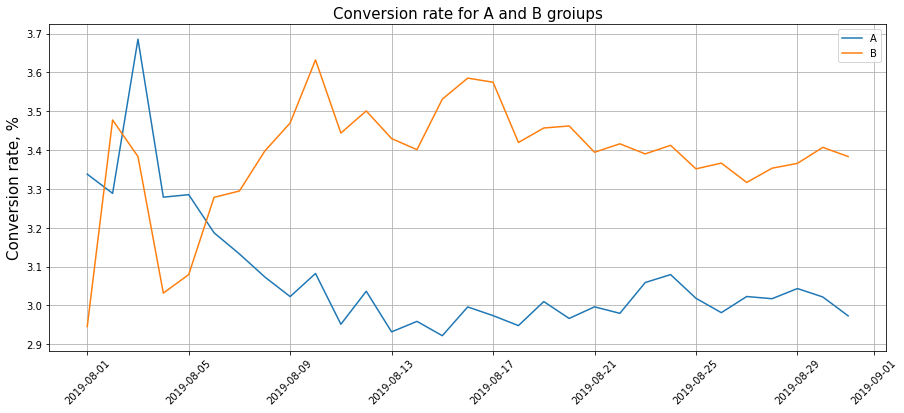

In [31]:
plt.figure(figsize=(15, 6))
plt.ylabel('Conversion rate, %', fontsize=15)
plt.xticks(rotation=45)
plt.title('Conversion rate for A and B groiups', fontsize=15,)
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion']*100, label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion']*100, label='B')
plt.legend();

We observe a very noticeable spike for both A and B groups on 1-2d of August. If we look at the previous plots at the same date, we see that there were not any raise in revenue nor in size of orders for A and B groups. So it might be some successful ad took place those days or a seasonal reason.
The groups were fluctuating around the same value, so we can tell about stabilizing starting from 11th of August

No handles with labels found to put in legend.


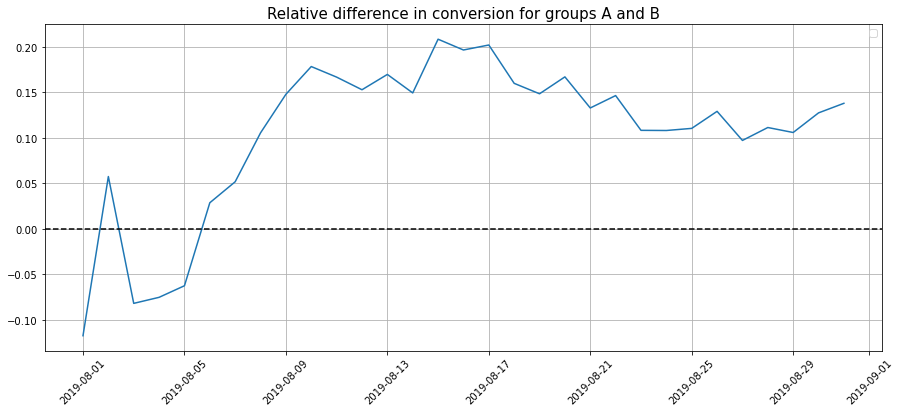

In [32]:
plt.figure(figsize=(15, 6))
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative difference in conversion for groups A and B', fontsize=15,)
plt.grid();

group A was lagging behind noticeably, but then it suddenly took the lead. Then its conversion fell again, and now it's growing gradually. The only period when conversion is below the average on the plot is 3-5th of August. In general, the conversion ratio tends to stabilize

### 5.Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.<a class="tocSkip">

first find the number of orders per user and sort it in descending order

In [33]:
ordersperId = orders.pivot_table(index=["visitorId"], values = "transactionId", aggfunc= "count").sort_values('transactionId', ascending=False).reset_index()
ordersperId.head()

,visitorId,transactionId
0,4256040402,11
1,2458001652,11
2,2378935119,9
3,2038680547,8
4,199603092,5


In [34]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

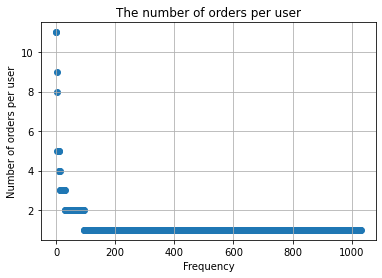

In [35]:
x_values = pd.Series(range(0, len(ordersperId['transactionId'])))
plt.scatter(x_values, ordersperId['transactionId']);
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Number of orders per user")
plt.title('The number of orders per user')
plt.show();

In [36]:
ordersperId['transactionId'].describe()

count    1031.000000
mean     1.161009   
std      0.724919   
min      1.000000   
25%      1.000000   
50%      1.000000   
75%      1.000000   
max      11.000000  
Name: transactionId, dtype: float64

The max of orders per user is 11. The majority of users made have 1 order. 

### 6.Calculate the 95th and 99th percentiles for the number of orders per user.Define the point at which a data point becomes an anomaly.<a class="tocSkip">


In [37]:
print(np.percentile(ordersperId['transactionId'], [95, 99])) 

[2. 4.]


No more than 5% of users made 2 orders, and no more than 1% users made more than 4 orders. Thus, it would be reasonable to set 2 orders per user as the lower limit for the number of orders and to filter anomalies on that basis.

### 7.Plot a scatter chart of order prices. Make conclusions and conjectures.<a class="tocSkip">

In [38]:
x_val = pd.Series(range(0, len(orders['revenue'])))
orders = orders.sort_values(by='revenue',ascending=False)

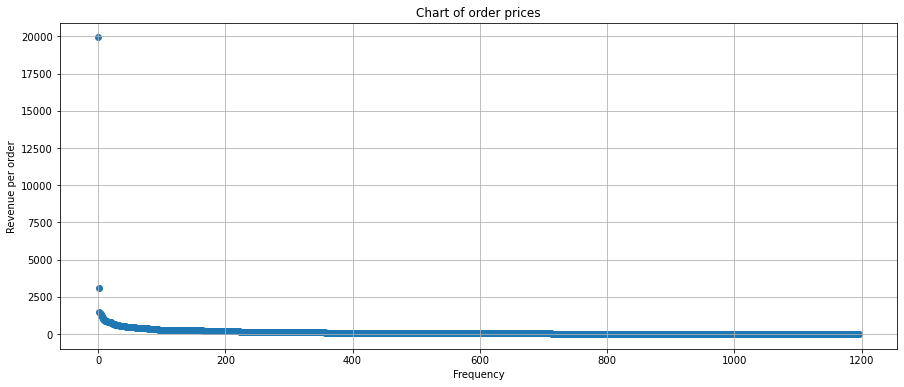

In [39]:
plt.figure(figsize=(15, 6))
plt.scatter(x_val, orders['revenue'])
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Revenue per order")
plt.title('Chart of order prices')
plt.show();

In [40]:
orders['revenue'].describe()

count    1197.000000 
mean     131.491646  
std      603.004729  
min      5.000000    
25%      20.800000   
50%      50.200000   
75%      130.400000  
max      19920.400000
Name: revenue, dtype: float64

Based on the graph, there are several big orders. We can set the limit for abnormal orders: around 20000 and around 3000. However, generally, the most of the prices are less than 130.

### 8.Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.<a class="tocSkip">

In [41]:
print(np.percentile(orders['revenue'], [93, 95, 99])) 

[331.9   435.54  900.904]


No more than 5% of orders cost more than 435.5, and no more than 1% cost more than 900.9. Thus, it would be possible to set an order price 350 as the lower limit to filter anomalies

### 9.Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.<a class="tocSkip">

Lets define null and alternative hypothesis:<br> Null Hypothesis H0: There is no statistically significant difference in conversion between groups A and B row data.<br> Alternative Hypothesis H1: There is a statistically significant difference in conversion between groups A and B row data.
For all test below lets set Significance Level p-value equal 0.05

 For users with at least one order, we'll indicate the number of orders made:

In [42]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

the Mann-Whitney test:

In [43]:
alpha = .05
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['transactionId'])), name='transactionId')],axis=0)
sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['transactionId'])), name='transactionId')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
if (stats.mannwhitneyu(sampleA, sampleB)[1]) < alpha:
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 
print("\n""{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.008
Null hypothesis rejected: the difference is statistically significant

0.138


Conclusion: based on the raw data, there is a difference between groups A and B.
The first row of the output gives us the p-value, 0.008, which is a less than significance level 0.05. So we can reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. The relative conversion gain for group B compared with A is 13.8%. If we look at Relative difference plot in Question 4 we will see that Group B was the leader in conversion almost from the very beginning of the period. It gained steadily and almost stabilized 15% higher than group A. So relative difference is 10-15%

### 10.Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures<a class="tocSkip">

Null Hypothesis H0: There is no statistically significant difference in average order size between groups A and B row data.<br> Alternative Hypothesis H1: There is a statistically significant difference in average order size between groups A and B row data.

In [44]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
if ((stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]) < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

print("\n"'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


0.346
Failed to reject the null hypothesis: we can't make conclusions about the difference

0.252


The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis. Means, There are no statistically significant differences between the groups average order size. Nonetheless, the average order size for group B is much bigger than it is for group A (25%) so we can observe it in question 3 on the plot. We cant draw any definite conclusion from that graph about stabilizing the group B.

### 11.Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.<a class="tocSkip">

Null Hypothesis H0: There is no statistically significant difference in conversion between groups A and B filtered data.<br>
Alternative Hypothesis H1: There is a statistically significant difference in conversion between groups A and B filtered data.

first define the filtered data for groups A and B

In [45]:
ordersByUsersA_filt = ordersByUsersA.loc[ordersByUsersA['transactionId'] <2]
ordersByUsersB_filt = ordersByUsersB.loc[ordersByUsersB['transactionId'] <2]

the Mann-Whitney test:

In [46]:
alpha = .05
sampleA_filt = pd.concat([ordersByUsersA_filt['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA_filt['transactionId'])), name='transactionId')],axis=0)
sampleB_filt = pd.concat([ordersByUsersB_filt['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB_filt['transactionId'])), name='transactionId')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA_filt, sampleB_filt)[1]))
if ((stats.mannwhitneyu(sampleA_filt, sampleB_filt)[1]) < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 
print("\n""{0:.3f}".format(sampleB_filt.mean()/sampleA_filt.mean()-1))


0.009
Null hypothesis rejected: the difference is statistically significant

0.156


The results for conversion didn't change much compare to row data (p-value was 0.008 and the difference between the segments was 0.138)

### 12.Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.<a class="tocSkip">

Null Hypothesis H0: There is no statistically significant difference in average order size between groups A and B filtered data.<br>
Alternative Hypothesis H1: There is a statistically significant difference in average order size between groups A and B filtered data.

In [47]:
orders_f = orders.loc[orders['revenue'] < 350]

In [48]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders_f[orders_f['group']=='A']['revenue'], orders_f[orders_f['group']=='B']['revenue'])[1]))
if (stats.mannwhitneyu(orders_f[orders_f['group']=='A']['revenue'], orders_f[orders_f['group']=='B']['revenue'])[1]) < alpha:
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

print("\n"'{0:.3f}'.format(orders_f[orders_f['group']=='B']['revenue'].mean()/orders_f[orders_f['group']=='A']['revenue'].mean()-1)) 

0.415
Failed to reject the null hypothesis: we can't make conclusions about the difference

-0.026


Again the p-value is is higher than significance level, so we can conclude that average order size doesnt differ between the groups. Now the difference between the segments is only 4% (vs 25%). It shows that anomalies does affect the A/B test results

### 13. Make a decision based on the test results. The possible decisions are: -Stop the test, consider one of the groups the leader.  - Stop the test, conclude that there is no difference between the groups.- Continue the test.<a class="tocSkip">

Conclusions from the test:
- There's a statistically significant difference in conversion between the groups, according to both the raw and the filtered data.
- Both the raw data and the filtered data didn't show a statistically significant difference between the groups in terms of average purchase size
- In terms of relative difference group B was stabilized about 15% higher than group A.
- Based on these facts we can stop the test considering group B as the leader that can boost the revenue